# Project 11-2: Use multiple regression with the MPG data

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

## Tasks

In [2]:
# 1
data = sns.load_dataset('mpg')

In [3]:
# 2
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# 3
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# 4
data['brand'] = data.apply(lambda x: x['name'].split()[0], axis=1)

In [6]:
# 5
data.drop(columns='name', inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford


In [7]:
# 6
data.brand.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [8]:
# 7
data.brand = data.brand.replace({'maxda':'mazda', 'vokswagen':'volkswagen', 'chevroelt':'chevy', 'vw':'volkswagen', 'toyouta':'toyota', 'mercedes-benz':'mercedes'})

In [9]:
# 8
data.dropna(inplace=True)

In [10]:
# 9
catColumns = data.select_dtypes('object').columns.tolist()
dummies = pd.get_dummies(data[catColumns])

In [11]:
# 10
dataDummies = data.drop(columns=catColumns)
dataDummies = dataDummies.join(dummies)
dataDummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mpg               392 non-null    float64
 1   cylinders         392 non-null    int64  
 2   displacement      392 non-null    float64
 3   horsepower        392 non-null    float64
 4   weight            392 non-null    int64  
 5   acceleration      392 non-null    float64
 6   model_year        392 non-null    int64  
 7   origin_europe     392 non-null    bool   
 8   origin_japan      392 non-null    bool   
 9   origin_usa        392 non-null    bool   
 10  brand_amc         392 non-null    bool   
 11  brand_audi        392 non-null    bool   
 12  brand_bmw         392 non-null    bool   
 13  brand_buick       392 non-null    bool   
 14  brand_cadillac    392 non-null    bool   
 15  brand_capri       392 non-null    bool   
 16  brand_chevrolet   392 non-null    bool   
 17  br

In [12]:
# 11
scaler = StandardScaler()
numCols = ['cylinders','displacement','horsepower','weight','acceleration','model_year']
dataDummies[numCols] = scaler.fit_transform(dataDummies[numCols])
dataDummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,...,brand_peugeot,brand_plymouth,brand_pontiac,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_triumph,brand_volkswagen,brand_volvo
0,18.0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,15.0,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,18.0,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,16.0,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,17.0,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,False,False,True,...,False,False,False,False,False,False,False,False,False,False
394,44.0,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,True,False,False,...,False,False,False,False,False,False,False,False,True,False
395,32.0,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,False,False,True,...,False,False,False,False,False,False,False,False,False,False
396,28.0,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# 12
dataDummies.corr()[['mpg']].sort_values('mpg', ascending=False)

,mpg
mpg,1.000000
model_year,0.580541
origin_japan,0.451454
acceleration,0.423329
brand_volkswagen,0.262610
brand_datsun,0.245564
brand_honda,0.245092
origin_europe,0.244313
brand_toyota,0.161369
brand_mazda,0.150744


In [14]:
# 13
x_train, x_test = train_test_split(dataDummies, test_size=0.20, random_state=20)

In [15]:
# 14
model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(x_train.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(x_train.drop(columns=['mpg']), x_train['mpg'])

    x_train_fs = fs.transform(x_train.drop(columns=['mpg']))
    x_test_fs = fs.transform(x_test.drop(columns=['mpg']))

    model.fit(x_train_fs, x_train['mpg'])
    
    testScore = model.score(x_test_fs, x_test['mpg'])
    trainScore = model.score(x_train_fs, x_train['mpg'])
    testScores.append(testScore)
    trainScores.append(trainScore)

<Axes: xlabel='numFeatures'>

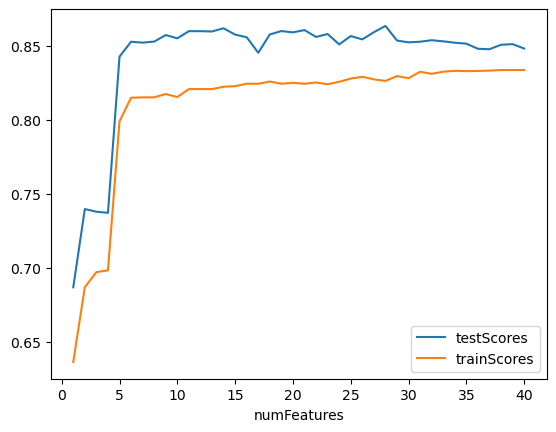

In [16]:
# 15
df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df['numFeatures'] = df['numFeatures'] + 1
df.plot(x='numFeatures', y=['testScores','trainScores'])